In [3]:
import sqlite3

# Connect to (or create) the SQLite database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create a simple sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert some dummy data
sales_data = [
    ("Laptop", 4, 800),
    ("Mouse", 10, 25),
    ("Keyboard", 6, 45),
    ("Monitor", 3, 300),
    ("Laptop", 2, 800),
    ("Mouse", 5, 25),
    ("Monitor", 2, 300),
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)

# Commit and close for now
conn.commit()
conn.close()


In [5]:
import pandas as pd

# Reconnect to the database
conn = sqlite3.connect("sales_data.db")

# SQL query to get total quantity and revenue
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Execute query and load results into a DataFrame
df = pd.read_sql_query(query, conn)

# Print the result
print("Sales Summary:")
print(df)

# Close the connection
conn.close()


Sales Summary:
    product  total_qty  revenue
0  Keyboard         12    540.0
1    Laptop         12   9600.0
2   Monitor         10   3000.0
3     Mouse         30    750.0


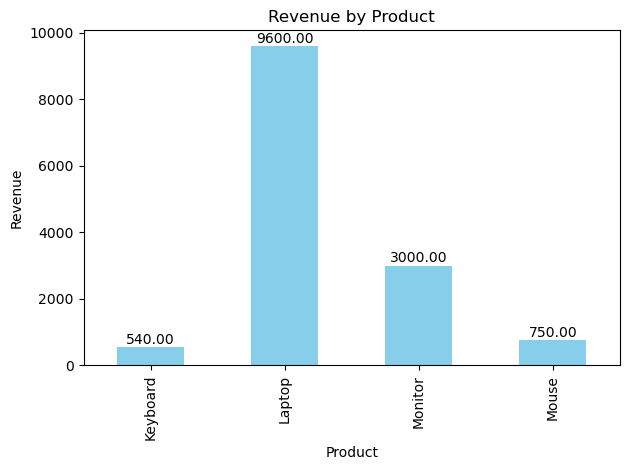

In [9]:
import matplotlib.pyplot as plt

# Plot revenue by product
ax = df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')

# Add labels and title
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
# Add value labels on top of each bar
for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2,        # X position
            i.get_height() + 10,                # Y position (slightly above bar)
            f'{i.get_height():.2f}',            # Text to display (formatted to 2 decimal places)
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()


# Save the chart (optional)
plt.savefig("sales_chart.png")

# Show the chart
plt.show()
